###  DS 201 Exam 2, Fall 2020, ISU,  Julia Lundstrum.

### Instructions: 
- This exam is due on 11/13/2020 Friday at 11:59 PM
- Each problem is worth 20 points.
- You can use our HWs, Labs, their solutions, our textbook, lecture notes or any online source to do these problems.
- Common Piazza threads will be in radio silence during this exam. Do not post or share any codes in piazza. If you are not clear about the question, send me a private question in piazza.
- Discussion and Collaboration of any kind among students about exam problems in piazza common forum, in-person meeting, email, canvas discussion board, or other online websites is strictly prohibited. 
- We use Turnitin software to find out if your work is plagiarized or copied from somewhere. Any academic misconduct will be reported to the dean of students office immediately. 
- Please read the following pledge and sign(by writing your full name) and date it. Your exam won't be graded if you fail to sign the following pledge.

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", None, "display.max_columns", None)

## I Pledge on my honor that I have not violated the Iowa  State University Academic Integrity Code while taking this exam.

## Julia Lundstrum 11/13/2020                              

In [2]:
cars = pd.read_csv('cars.csv')
cars.columns = cars.columns.str.replace(" ","")
cars = cars.replace(r'^\s+$', np.nan, regex=True)
cars = cars.dropna()
cars.cubicinches = cars.cubicinches.astype(int)
cars.weightlbs = cars.weightlbs.astype(int)
print(cars.head())
print(cars.dtypes)
print(cars.isna().sum())

    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year     brand
0  14.0          8          350  165       4209          12  1972       US.
1  31.9          4           89   71       1925          14  1980   Europe.
2  17.0          8          302  140       3449          11  1971       US.
3  15.0          8          400  150       3761          10  1971       US.
4  30.5          4           98   63       2051          17  1978       US.
mpg            float64
cylinders        int64
cubicinches      int64
hp               int64
weightlbs        int64
time-to-60       int64
year             int64
brand           object
dtype: object
mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64


### Problem 1
There are eight columns in the cars data set, many of which are numerical, and some are categorical variables. You have to preprocess the data before going into modeling. Please pay attention to all the variables. Some are numerical but labeled as objects, some have extra spaces in their name, and some have labels. Do the preprocessing on which variables to include in a linear model. Fit a Multiple  Linear Regression model to predict mpg by dividing the data with (75, 25) rule in testing and training. Report your $R^2$ for both the training and testing set.  

In [3]:
y = cars.mpg
x = cars[['cylinders','cubicinches','hp','weightlbs','time-to-60','year']]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
#model.summary()

In [4]:
x1 = x[['cylinders', 'cubicinches', 'weightlbs','time-to-60','year']]
X1 = sm.add_constant(x1)
model1 = sm.OLS(y,X1).fit()
#model1.summary()

In [5]:
x2 = x[['cubicinches', 'weightlbs','time-to-60','year']]
X2 = sm.add_constant(x2)
model2 = sm.OLS(y,X2).fit()
#model2.summary()

In [6]:
x3 = x[['weightlbs','time-to-60','year']]
X3 = sm.add_constant(x3)
model3 = sm.OLS(y,X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     341.4
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.91e-88
Time:                        19:39:35   Log-Likelihood:                -683.25
No. Observations:                 256   AIC:                             1375.
Df Residuals:                     252   BIC:                             1389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1432.3022    127.610    -11.224      0.000   -1683.620   -1180.985
weightlbs     -0.0064      0.000    -21.324      0.000      -0.007      -0.006
time-to-60     0.1994      0.089      2.241      0.026       0.024       0.375
year           0.7444      0.065     11.519      0.000       0.617       0.872
==============================================================================
Omnibus:                       27.198   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.543
Skew:                           0.665   Prob(JB):                     1.57e-09
Kurtosis:                       4.426   Cond. No.                     2.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
x = x3
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)
X_train=sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
modtrain=sm.OLS(y_train,X_train).fit()
modtest=sm.OLS(y_test,X_test).fit()
ypred=modtrain.predict(X_train)
y_pred=modtest.predict(X_test)
print(r2_score(y_test, y_pred))
print(r2_score(y_train, ypred))

0.8197026105675437
0.8088665652586344


###  Problem 2
From the original cars data from problem 1, make a scatter plot of hp (in x-axis) vs. mpg (in the y-axis). Now train a linear regression model, quadratic regression model, and a cubic regression model using mpg as a response and hp as a feature—Divide  80% data for the training and the rest for the testing. Report train and test set $R^2$ for all three models and explain which model you would choose as the best model and why? Finally, plot regression lines (all three) with the scatter plot.

I would choose the quadratic regression model because it seems to be the best fit for the data. The added cubic term for the cubic regression model doesn't really seem to improve it.

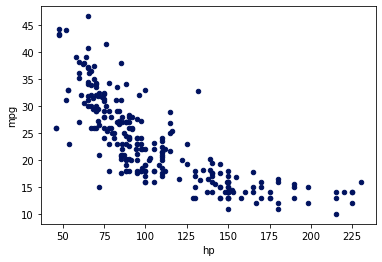

In [8]:
cars.plot.scatter(x='hp',y='mpg', color='#00125f')

R^2 for training model: 0.6734842062006965
R^2 for training model: 0.5952847417229945


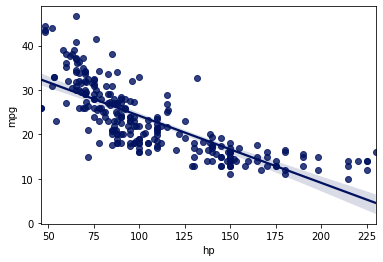

In [9]:
x = cars.hp
y = cars.mpg
X = sm.add_constant(x)
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
lr = sm.OLS(y, X)
lr.fit().summary()
X_traina =sm.add_constant(x_train)
X_testa = sm.add_constant(x_test)
modtraina =sm.OLS(y_train,X_traina).fit()
modtesta =sm.OLS(y_test,X_testa).fit()
y_predatrain =modtraina.predict(X_traina)
y_predatest =modtesta.predict(X_testa)
print("R^2 for training model:",r2_score(y_test, y_predatest))
print("R^2 for training model:",r2_score(y_train, y_predatrain))
sns.regplot(x='hp', y='mpg', data=cars, color='#00125f')

R^2 for training model: 0.7110467898843684
R^2 for training model: 0.707184028747432


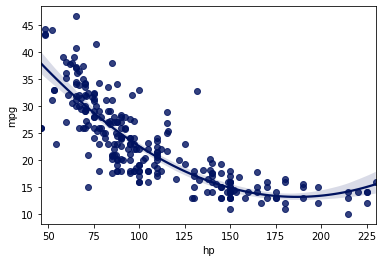

In [10]:
cars["hpsq"] = cars.hp**2
xq = cars[['hp', 'hpsq']]
xq = sm.add_constant(xq)
x_train, x_test, y_train, y_test=train_test_split(xq,y,test_size=0.2)
X_trainb =sm.add_constant(x_train)
X_testb = sm.add_constant(x_test)
modtrainb =sm.OLS(y_train,X_trainb).fit()
modtestb =sm.OLS(y_test,X_testb).fit()
y_predbtrain =modtrainb.predict(X_trainb)
y_predbtest =modtestb.predict(X_testb)
print("R^2 for training model:",r2_score(y_test, y_predbtest))
print("R^2 for training model:",r2_score(y_train, y_predbtrain))
sns.regplot(x='hp', y='mpg', data=cars, order = 2, color='#00125f')

R^2 for testing model: 0.7192922172343584
R^2 for training model: 0.7103896984072648


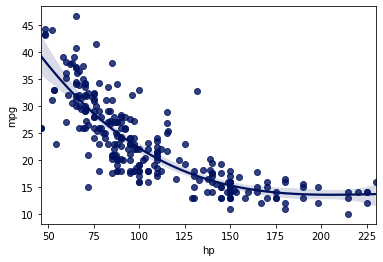

In [11]:
cars["hpcu"] = cars.hp**3
xc = cars[['hp','hpsq','hpcu']]
xc = sm.add_constant(xc)
x_train, x_test, y_train, y_test=train_test_split(xc,y,test_size=0.2)
X_trainc =sm.add_constant(x_train)
X_testc = sm.add_constant(x_test)
modtrainc =sm.OLS(y_train,X_trainc).fit()
modtestc =sm.OLS(y_test,X_testc).fit()
y_predctrain =modtrainc.predict(X_trainc)
y_predctest =modtestc.predict(X_testc)
print("R^2 for testing model:", r2_score(y_test, y_predctest))
print("R^2 for training model:", r2_score(y_train, y_predctrain))
sns.regplot(x='hp', y='mpg', data=cars, order = 3, color='#00125f')

### Problem 3
Continuing with the original cars data from problem 1, look at the column "brand." It has 3 labels: ( 'US.', 'Japan.', 'Europe.'). Change the labels in the "brand" column to either 'US' or 'non-US.' Among all the variables you have, decide which variables you want to use and why for a classification model. Please use the (80, 20) rule for the split. Train the Logistic Regression Classification model with the brand as a response and the variables you selected as features. Report the test and train accuracy with their confusion matrix.

In [12]:
cars = cars.replace('Japan.', 'non-US.', regex=True)
cars = cars.replace('Europe.', 'non-US.', regex=True)
array = cars.values
x = array[:, 1:4]
y = array[:, 7]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
ypred = log_reg.predict(x_train)
print("Accuracy for testing model:",metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy for training model:",metrics.accuracy_score(y_train,ypred))
print(confusion_matrix(y_train, ypred))

Accuracy for testing model: 0.8846153846153846
[[29  5]
 [ 1 17]]
Accuracy for training model: 0.9019607843137255
[[107  17]
 [  3  77]]


### Problem 4
Load the socialnetworkads data. It has data on whether a person who saw an ad on a social network purchased the item. Split the data with the (80, 20) rule. Use Age, EstimatedSalary, and Gender(after one-hot encoding) columns to make a CART model to classify the response variable "purchased." Report the accuracy score and confusion matrix for the test data. If Zach is a 30-year-old male whose estimated salary is $55,000. Will Zach purchase the item after seeing it on social media?

In [13]:
sna = pd.read_csv('socialnetworkads.csv')
sna = pd.concat([sna, pd.get_dummies(sna['Gender'])], axis=1)
sna.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [14]:
y=sna.Purchased
x=sna[['Age', 'EstimatedSalary','Female']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
carttest = DecisionTreeClassifier()
carttest = carttest.fit(x_test, y_test)
test_pred = carttest.predict(x_test)
acc = metrics.accuracy_score(test_pred, y_test)
print("Test Set Accuracy:", acc)
cm = metrics.confusion_matrix(test_pred,y_test)
print(cm)

Test Set Accuracy: 1.0
[[58  0]
 [ 0 22]]


In [15]:
xzach=[[30,55000,0]]
zach_pred = carttest.predict(xzach)
print(zach_pred)

[0]


My model predicts that Zach will not purchase the item after seeing it on social media.

### Problem 5
Upload the mallcustomers data. Columns are self-explanatory. Let X be the data with only the last two columns: 'Annual Income (k$)', and 'Spending Score (1-100)'. Use KMneas clustering to divide X into 5 clusters. Plot 5 clusters with their centroids in five different colors. Make sure to give proper labels and a title for the plot.

In [16]:
mc = pd.read_csv('mallcustomers.csv')
x = mc[['Annual Income (k$)', 'Spending Score (1-100)']]
mc.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 0.98, 'k-Means clusters with Annual Income and Spending Score')

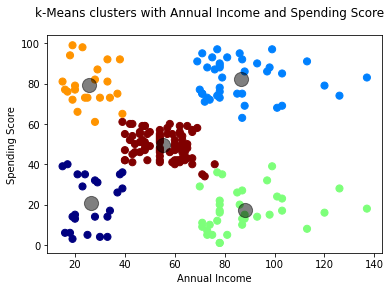

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
x = np.array(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50,cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.suptitle("k-Means clusters with Annual Income and Spending Score")